In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import laspy

In [34]:
# Define the coordinates of the boundary polygon
coord1 = [241542, 3127817]
coord2 = [241854, 3127851]
coord3 = [242077, 3127563]
coord4 = [241838, 3127417]

boundary_coords = [coord1, coord2, coord3, coord4]

In [35]:
# Create a Path object from the boundary coordinates
boundary_vertices = [(x, y) for x, y in boundary_coords]
boundary_path = mpath.Path(boundary_vertices)

In [36]:
# Load the lidar data file
lidar_data = laspy.read('/Users/ravitiwari/Downloads/PARAS/TASK/Working on Data/point2.las')
x_coords = lidar_data.x
y_coords = lidar_data.y
z_coords = lidar_data.z

In [37]:
# Combine the coordinates into a single numpy array
lidar_data = np.column_stack((x_coords, y_coords, z_coords))

In [38]:
# Extract the points within the boundary polygon
def extract_points(data, boundary):
    points_inside_polygon = []
    for point in data:
        if boundary.contains_point(point):
            points_inside_polygon.append(point)
    if len(points_inside_polygon) > 0:
        return np.array(points_inside_polygon)
    else:
        return np.empty((0, 2))

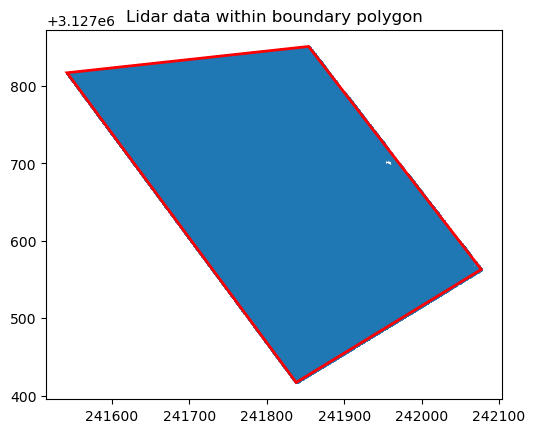

In [39]:
points_inside_boundary = extract_points(lidar_data[:, :2], boundary_path)

# Plot the points within the boundary polygon
fig, ax = plt.subplots()
ax.scatter(points_inside_boundary[:, 0], points_inside_boundary[:, 1], s=1)
ax.add_patch(plt.Polygon(np.array([coord1, coord2, coord3, coord4]), fill=False, edgecolor='r', lw=2))
ax.set_aspect('equal')
ax.set_title('Lidar data within boundary polygon')
plt.show()

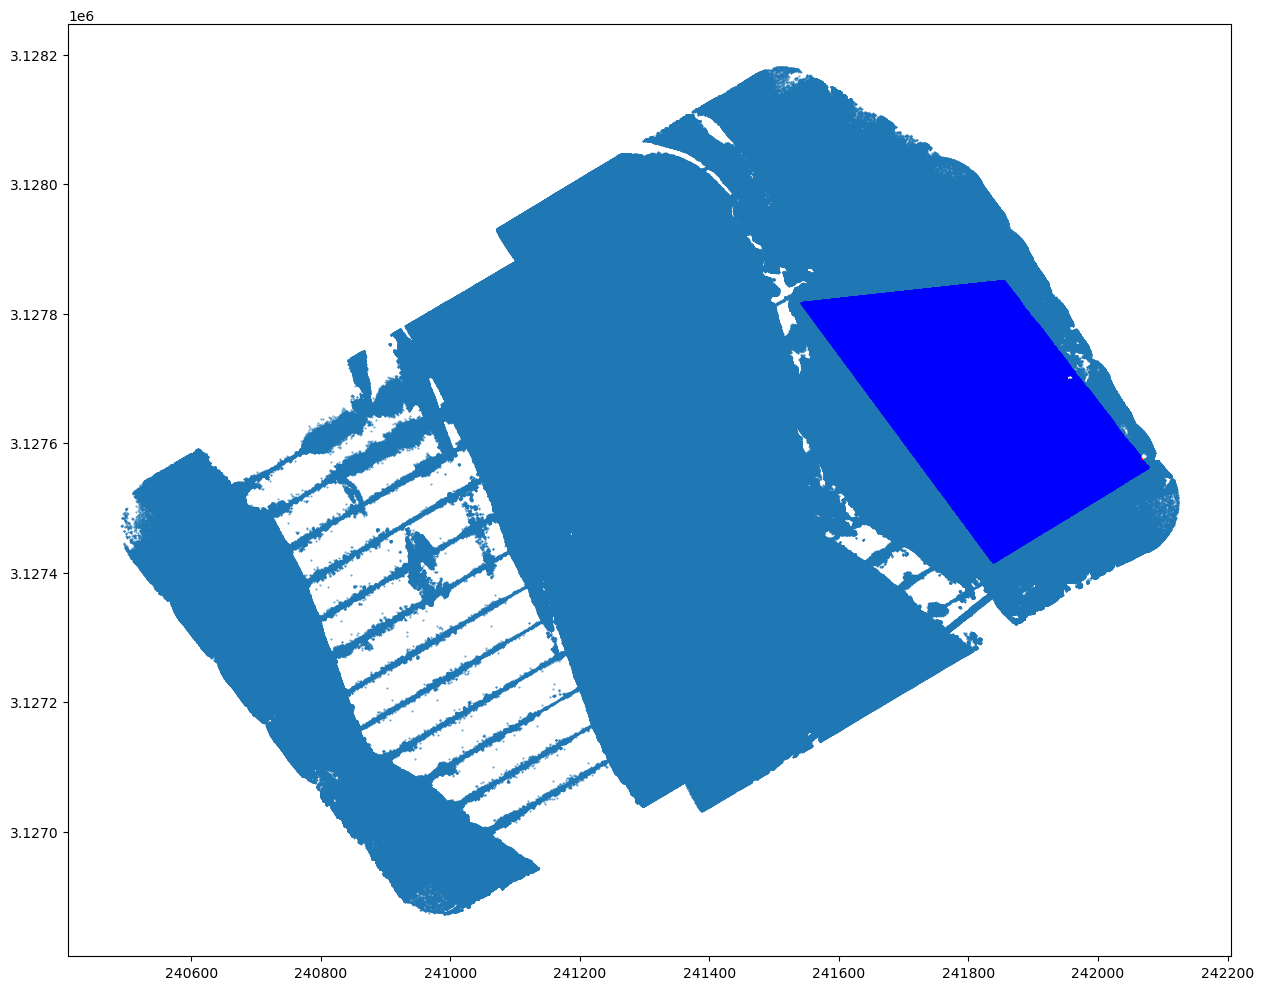

In [28]:
# Visualize the extracted points and the boundary polygon
fig, ax = plt.subplots(figsize=(15,15))
ax.plot(x_coords, y_coords, '*', markersize=1, alpha=0.5)
ax.plot(points_inside_boundary[:, 0], points_inside_boundary[:, 1], 'b.', markersize=1)
ax.add_patch(plt.Polygon(np.array([coord1, coord2, coord3, coord4]), fill=False, edgecolor='r', lw=2))
ax.set_aspect('equal')
plt.show()